# Veriyi Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Görselleştirme

(2, 500, 500, 3)
[1. 0. 0. 0.]


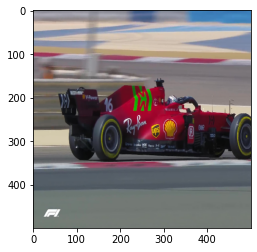

(2, 500, 500, 3)
[0. 0. 1. 0.]


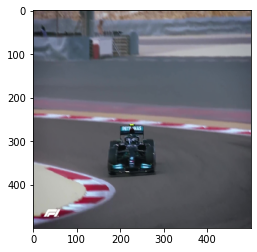

(2, 500, 500, 3)
[0. 1. 0. 0.]


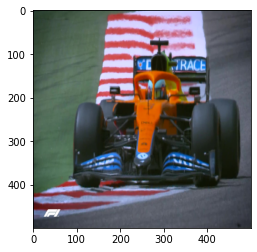

(2, 500, 500, 3)
[0. 1. 0. 0.]


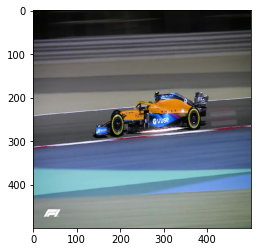

(2, 500, 500, 3)
[0. 0. 1. 0.]


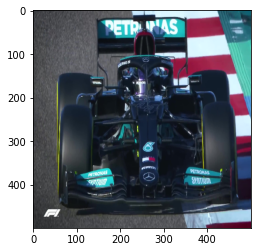

In [12]:
import matplotlib.pyplot as plt

for _ in range(5):
    img,label=test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

# Kütüphaneler

In [13]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Model Oluşumu

In [14]:
model=Sequential()

model.add(layers.Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=8,activation="elu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=16,activation="elu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=32,activation="elu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(4,activation="softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 496, 496, 4)       304       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 248, 248, 4)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 246, 246, 8)       296       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 123, 123, 8)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 122, 122, 16)      528       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 32)       

# Model Eğitimi

In [16]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [17]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [18]:
result=model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 21s 162ms/step - loss: 1.9499 - mse: 0.2175 - accuracy: 0.2857 - val_loss: 1.5494 - val_mse: 0.2054 - val_accuracy: 0.3214
Epoch 2/5
126/126 [==============================] - 21s 165ms/step - loss: 1.3405 - mse: 0.1735 - accuracy: 0.4444 - val_loss: 1.5500 - val_mse: 0.1853 - val_accuracy: 0.4286
Epoch 3/5
126/126 [==============================] - 23s 184ms/step - loss: 1.0778 - mse: 0.1454 - accuracy: 0.5397 - val_loss: 1.4682 - val_mse: 0.1900 - val_accuracy: 0.4643
Epoch 4/5
126/126 [==============================] - 24s 186ms/step - loss: 0.9629 - mse: 0.1243 - accuracy: 0.6548 - val_loss: 1.7199 - val_mse: 0.1834 - val_accuracy: 0.5000
Epoch 5/5
126/126 [==============================] - 22s 176ms/step - loss: 0.8291 - mse: 0.1067 - accuracy: 0.7063 - val_loss: 1.0745 - val_mse: 0.1542 - val_accuracy: 0.5000


In [12]:
result.history

{'loss': [1.6052520275115967,
  1.0511542558670044,
  0.5929352045059204,
  0.20376001298427582,
  0.05751117691397667],
 'mse': [0.19995705783367157,
  0.14155329763889313,
  0.07695674151182175,
  0.023255597800016403,
  0.004541774746030569],
 'accuracy': [0.329365074634552,
  0.5515872836112976,
  0.7936508059501648,
  0.9484127163887024,
  0.9920634627342224],
 'val_loss': [1.3971930742263794,
  1.1193382740020752,
  1.5974671840667725,
  1.9416427612304688,
  1.92861008644104],
 'val_mse': [0.18921181559562683,
  0.15089575946331024,
  0.20824284851551056,
  0.2278103530406952,
  0.2317742556333542],
 'val_accuracy': [0.3214285671710968,
  0.5357142686843872,
  0.3214285671710968,
  0.3571428656578064,
  0.3571428656578064]}

# Model Testi

In [9]:
model.evaluate(test_datagen)

14/14 [==============================] - 1s 43ms/step - loss: 1.8531 - mse: 0.1993 - accuracy: 0.4643


[1.8530982732772827, 0.19930943846702576, 0.4642857015132904]

### Test Veri Seti Üzerinden Test

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
mercedes


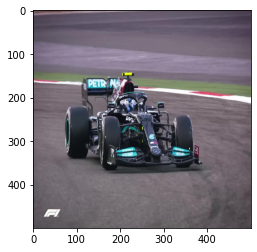

mclaren


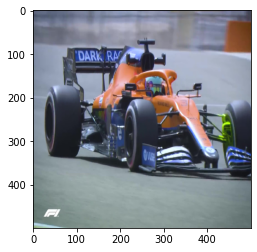

mclaren


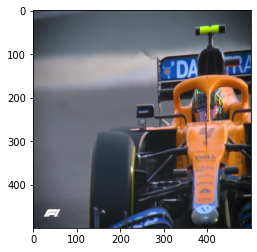

ferrari


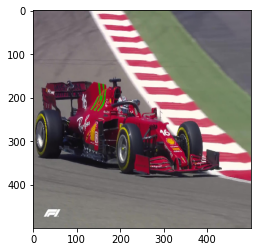

ferrari


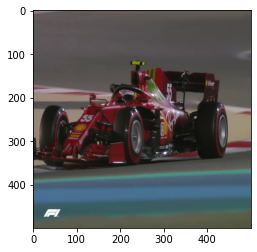

mercedes


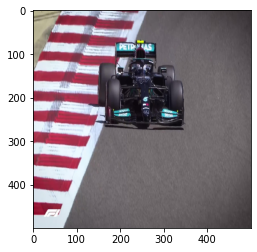

mclaren


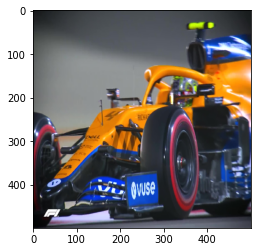

ferrari


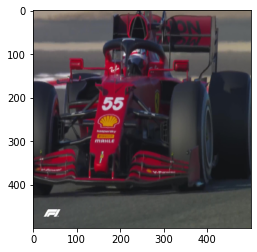

mclaren


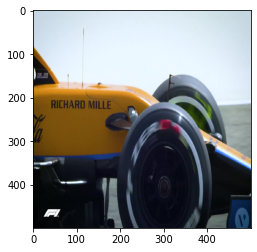

mercedes


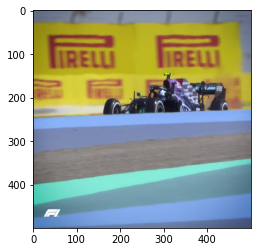

In [17]:
print(test_datagen.class_indices)
for _ in range(10):
    img,label =train_datagen.next()
    a=model.predict(img)
    np.argmax(a[0]) 
    plt.imshow(img[0])
    if np.argmax(a[0])==0:
        print("ferrari")
    if np.argmax(a[0])==1:
        print("mclaren")
    if np.argmax(a[0])==2:
        print("mercedes")
    if np.argmax(a[0])==3:
        print("redbull")
        
    plt.show()   

### Tek Resim Üzerinden Test

In [10]:
from PIL import Image
from skimage import transform

In [16]:
image=Image.open(r"McLaren03981.jpg")

def tek_resim(path):
    image=Image.open(path)
    image=np.array(image).astype("float32")/255
    image=transform.resize(image,(500,500,3))
    image=np.expand_dims(image,axis=0)
    print(test_datagen.class_indices)
    return image

image=tek_resim("McLaren03981.jpg")
pred=model.predict(image)
print(pred)
np.argmax(pred)

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
[[2.9456073e-03 9.9664682e-01 2.8262907e-04 1.2492812e-04]]


1

# Test

In [9]:
test_a=model.predict(test_datagen)

In [10]:
t=[]
print(test_datagen.class_indices) 
for i in test_a:
    t.append(np.argmax(i))
x=zip(t,test_datagen.labels)
for i,j in x:
    print("Tahmin:{} Gerçek: {}".format(i,j))   

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
Tahmin:2 Gerçek: 0
Tahmin:3 Gerçek: 0
Tahmin:2 Gerçek: 0
Tahmin:2 Gerçek: 0
Tahmin:2 Gerçek: 0
Tahmin:1 Gerçek: 0
Tahmin:1 Gerçek: 0
Tahmin:2 Gerçek: 1
Tahmin:1 Gerçek: 1
Tahmin:2 Gerçek: 1
Tahmin:1 Gerçek: 1
Tahmin:2 Gerçek: 1
Tahmin:1 Gerçek: 1
Tahmin:2 Gerçek: 1
Tahmin:0 Gerçek: 2
Tahmin:1 Gerçek: 2
Tahmin:2 Gerçek: 2
Tahmin:3 Gerçek: 2
Tahmin:0 Gerçek: 2
Tahmin:1 Gerçek: 2
Tahmin:1 Gerçek: 2
Tahmin:2 Gerçek: 3
Tahmin:1 Gerçek: 3
Tahmin:3 Gerçek: 3
Tahmin:1 Gerçek: 3
Tahmin:1 Gerçek: 3
Tahmin:2 Gerçek: 3
Tahmin:1 Gerçek: 3


In [ ]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]

In [ ]:
epoch=range(1,len(acc)+1)

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label="Eğitim Başarısı",color="g")
plt.plot(epoch,val_acc,label="Doğrulama Başarısı",color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label="Eğitim Kaybı",color="g")
plt.plot(epoch,val_loss,label="Doğrulama Kaybı",color="r")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.legend()

In [ ]:
from skimage import transform
np_image = Image.open("McLaren03981.jpg")
np_image = np.array(np_image).astype('float32')/255
np_image = transform.resize(np_image, (500,500, 3))
image = np.expand_dims(np_image, axis=0)

In [ ]:
from tensorflow.keras import models
layers=[layer.output for layer in model.layers[:8]]
katman=models.Model(inputs=model.input,outputs=layers)
katman=katman.predict(image)
first=katman[0]
print(first.shape)

In [ ]:
plt.matshow(first[0,:,:,0],cmap="viridis")
plt.matshow(first[0,:,:,1],cmap="viridis")
plt.matshow(first[0,:,:,2],cmap="viridis")
plt.matshow(first[0,:,:,3],cmap="viridis")